rerun on 2021-12-07 after correcting for salinity of media samples


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“One or more parsing issues, see `problems()` for details”
Warning message:
“Removed 68 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 68 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 70 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


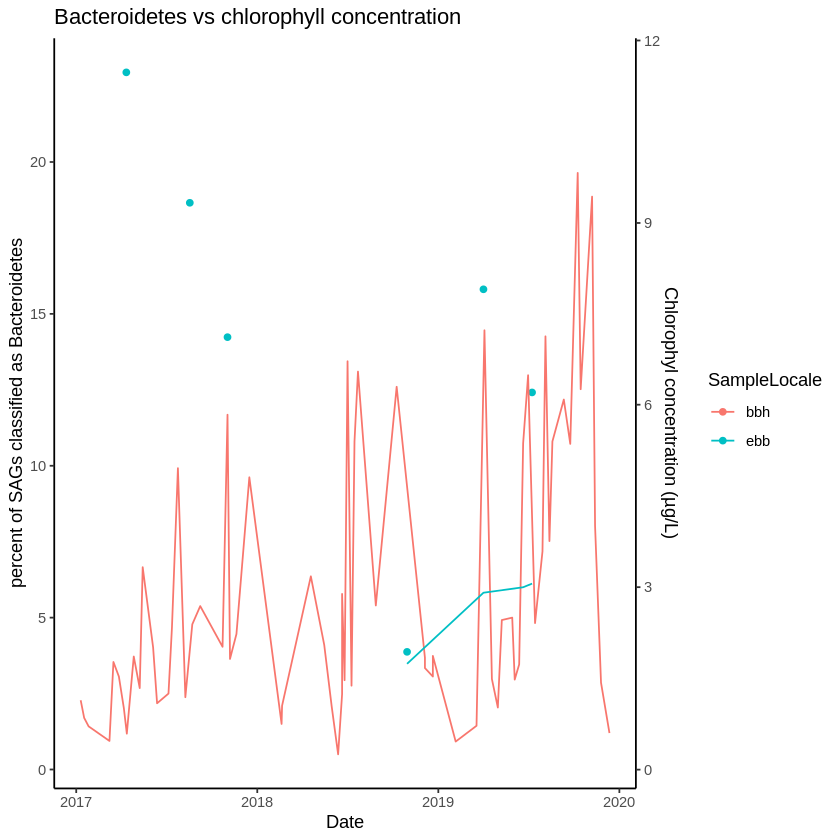

Saving 6.67 x 6.67 in image

Warning message:
“Removed 70 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 68 rows containing missing values (geom_point).”


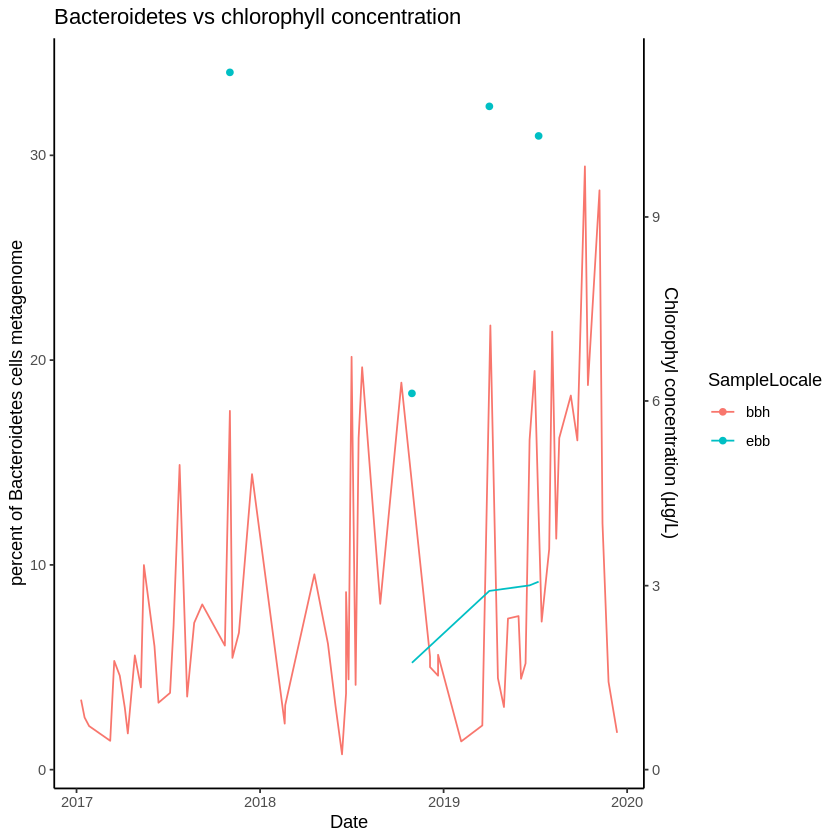

Saving 6.67 x 6.67 in image

Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 68 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 70 rows containing missing values (geom_point).”


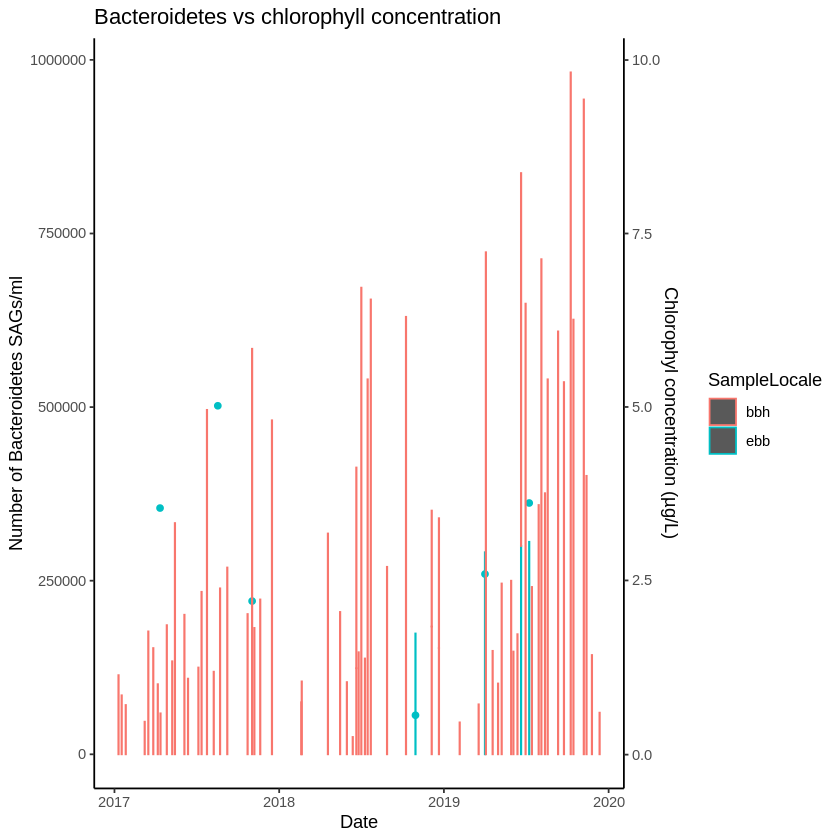

Saving 6.67 x 6.67 in image

Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 70 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


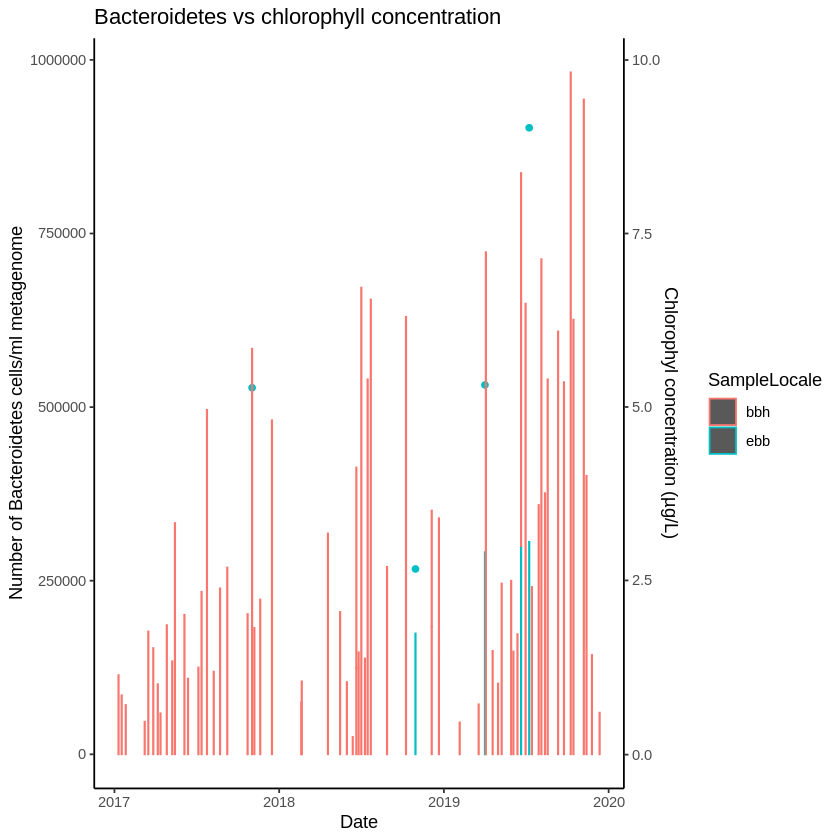

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'perc_SAGs' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. past

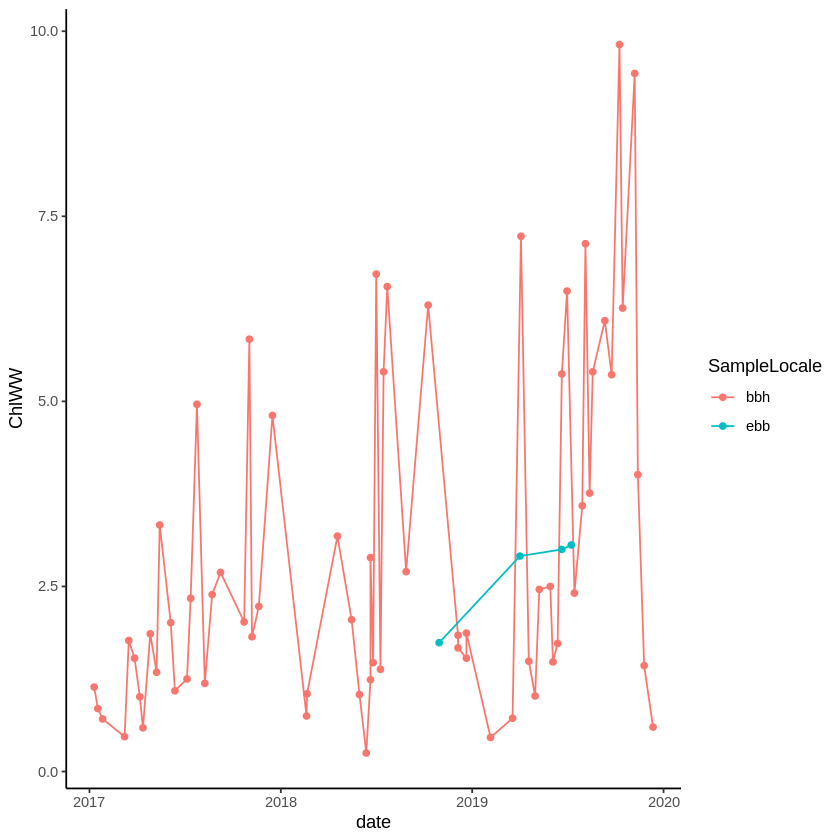

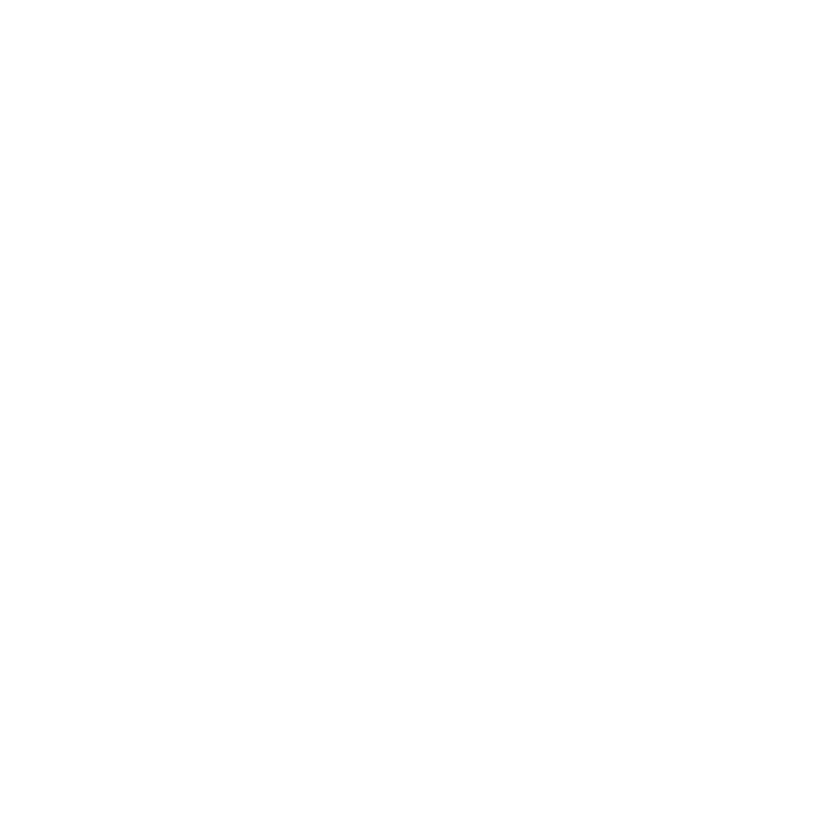

In [2]:
library(dplyr)
library(readr)
library(ggplot2)

setwd('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/chl_analysis')
filename <- "2017_2019_chla_measurements.tsv"

x <- readr::read_tsv(filename,  
                     col_types = "cnnnnncn",
                     na = c("NA", "NaN")) %>%
  dplyr::mutate(date = as.Date(date, format = "%Y%m%d"))

units <- strsplit(readLines(filename, n = 1), "\t")[[1]] %>%
  setNames(colnames(x))

#Percent of SAGs
ggplot(data = x, aes(date, perc_SAGs_bacteroidia, group = SampleLocale)) +
    geom_point(aes(color = SampleLocale)) +
    labs(x = "Date", y ="percent of SAGs classified as Bacteroidetes", title = "Bacteroidetes vs chlorophyll concentration") +
    geom_line(data=x, aes(date, ChlWW*2, group=SampleLocale, color=SampleLocale)) + 
    scale_y_continuous(sec.axis = sec_axis(~ . / 2, name="Chlorophyl concentration (µg/L)")) +
    theme_classic()

ggsave('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/chl_analysis/perc_bacteroidetes_SAGs_chl.pdf')

# percent of metagenome cells

ggplot(data = x, aes(date, perc_mg_bacteroidia, group = SampleLocale)) +
    geom_point(aes(color = SampleLocale)) +
    labs(x = "Date", y = 'percent of Bacteroidetes cells metagenome', title = "Bacteroidetes vs chlorophyll concentration") +
    geom_line(data=x, aes(date, ChlWW*3, group=SampleLocale, color=SampleLocale)) + 
    scale_y_continuous(sec.axis = sec_axis(~ . / 3, name="Chlorophyl concentration (µg/L)")) +
    theme_classic()

ggsave('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/chl_analysis/perc_bacteroidetes_metagenome_ml_chl.pdf')



# absolute abundance of SAGs
ggplot(data = x, aes(date, SAG_per_ml, group = SampleLocale)) +
    geom_point(aes(color = SampleLocale)) +
    labs(x = "Date", y = 'Number of Bacteroidetes SAGs/ml', title = "Bacteroidetes vs chlorophyll concentration") +
#    geom_line(data=x, aes(date, ChlWW*100000, group=SampleLocale, color=SampleLocale)) + 
    geom_col(data=x, aes(date, ChlWW*100000, group=SampleLocale, color=SampleLocale)) +
    scale_y_continuous(sec.axis = sec_axis(~ . / 100000, name="Chlorophyl concentration (µg/L)")) +
    theme_classic()
ggsave('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/chl_analysis/num_bacteroidetes_SAGs_ml_chl.pdf')

#absolute abundance of metagenomes
ggplot(data = x, aes(date, mg_per_ml, group = SampleLocale)) +
    geom_point(aes(color = SampleLocale)) +
    labs(x = "Date", y = 'Number of Bacteroidetes cells/ml metagenome', title = "Bacteroidetes vs chlorophyll concentration") +
#    geom_line(data=x, aes(date, ChlWW*100000, group=SampleLocale, color=SampleLocale)) + 
    geom_col(data=x, aes(date, ChlWW*100000, group=SampleLocale, color=SampleLocale)) +
    scale_y_continuous(sec.axis = sec_axis(~ . / 100000, name="Chlorophyl concentration (µg/L)")) +
    theme_classic()
ggsave('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/chl_analysis/num_bacteroidetes_metagenome_ml_chl.pdf')


ggplot(data = x, aes(date, ChlWW, group = SampleLocale, color=SampleLocale)) +
    geom_line() +
    geom_point()+
    theme_classic()

ggplot(data = x, aes(date, perc_SAGs, group = SampleLocale)) +
    geom_point(aes(color = SampleLocale))+
    theme_classic()



In [3]:
print(x)

# A tibble: 74 x 7
   date       SAG_per_ml perc_SAGs_bacteroid… mg_per_ml perc_mg_bacteroid… ChlWW
   <date>          <dbl>                <dbl>     <dbl>              <dbl> <dbl>
 1 2017-01-10        NA                  NA          NA                 NA  1.14
 2 2017-01-17        NA                  NA          NA                 NA  0.85
 3 2017-01-26        NA                  NA          NA                 NA  0.71
 4 2017-03-09        NA                  NA          NA                 NA  0.47
 5 2017-03-17        NA                  NA          NA                 NA  1.77
 6 2017-03-28        NA                  NA          NA                 NA  1.53
 7 2017-04-07        NA                  NA          NA                 NA  1.01
 8 2017-04-12    354616.                 23.0        NA                 NA NA   
 9 2017-04-13        NA                  NA          NA                 NA  0.59
10 2017-04-27        NA                  NA          NA                 NA  1.86
# … with 

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 68 rows containing missing values (geom_point).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 68 rows containing missing values (geom_point).”


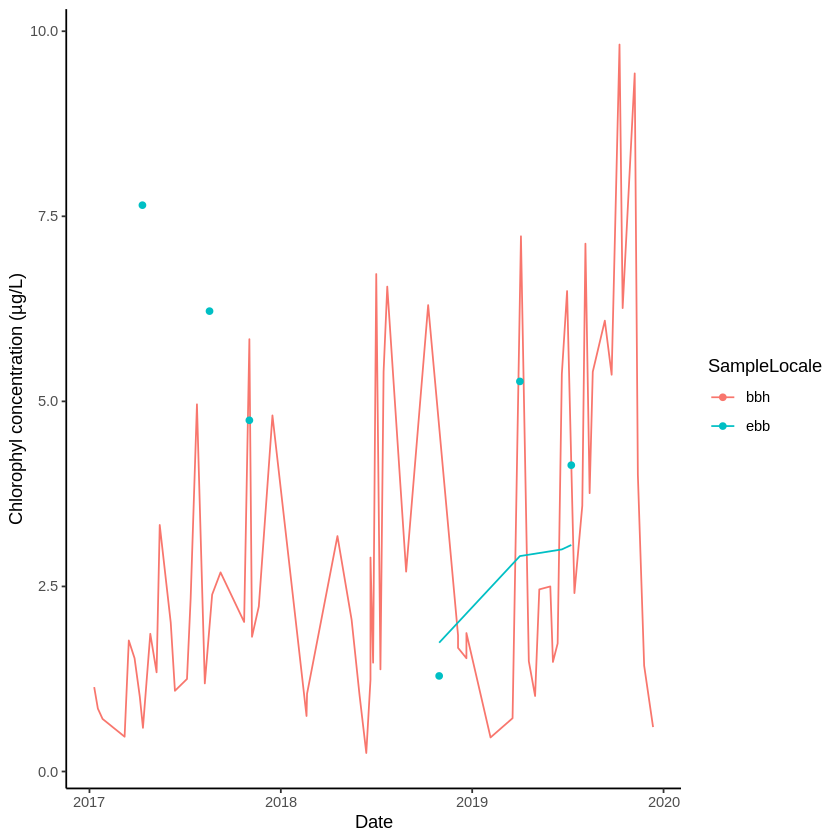

In [10]:
#Percent of SAGs
ggplot(data = x, aes(date, ChlWW, group = SampleLocale)) +
    geom_line(aes(color = SampleLocale)) +
    labs(x = "Date", y ="Chlorophyl concentration (µg/L)") +
    geom_point(data=x, aes(date, perc_SAGs_bacteroidia/3, group=SampleLocale, color=SampleLocale)) + 
   # scale_y_continuous(sec.axis = sec_axis(~ . * 2)) +
    theme_classic()

ggsave('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/chl_analysis/Fig_S10_EBB_chl.pdf')
